<a href="https://colab.research.google.com/github/segnig/Tanzania-Tourism-Prediction/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
FILE_PATH = "/content/drive/MyDrive/Data Science/Tanzania Tourism Prediction/"

# Import Libraries


*   `pandas` for data manipulation.
*   `numpy` for mathematics.
*   `matplotlib.pyplot` and `seaborn`  for data visualization.




In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ignore warning
import warnings
warnings.filterwarnings("ignore")

# File Path


In [3]:
TRAIN_FILE_PATH = FILE_PATH + "Train.csv"
TEST_FILE_PATH = FILE_PATH + "Test.csv"

## Load Data

Load data to DataFrame

In [4]:
train_df = pd.read_csv(TRAIN_FILE_PATH)
test_df = pd.read_csv(TEST_FILE_PATH)

**Shape of train data**

In [5]:
train_df.shape

(4809, 23)

In [6]:
train_df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


**Dataframe informations**

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [23]:
# Cardinality of the features across data
cardinality = train_df.nunique().sort_values(ascending=False)

# cardinality two
cardinality_2 = (cardinality[cardinality.values == 2].index).to_list()
cardinality_2

['package_insurance',
 'first_trip_tz',
 'package_food',
 'package_guided_tour',
 'package_sightseeing',
 'package_transport_tz',
 'package_transport_int',
 'tour_arrangement',
 'package_accomodation']

In [56]:
train_df[cardinality_2].head()

,package_insurance,first_trip_tz,package_food,package_guided_tour,package_sightseeing,package_transport_tz,package_transport_int,tour_arrangement,package_accomodation
0,No,No,No,No,No,No,No,Independent,No
1,No,Yes,No,No,No,No,No,Independent,No
2,No,No,No,No,No,No,No,Independent,No
3,No,Yes,Yes,Yes,Yes,Yes,No,Package Tour,Yes
4,No,Yes,No,No,No,No,No,Independent,No


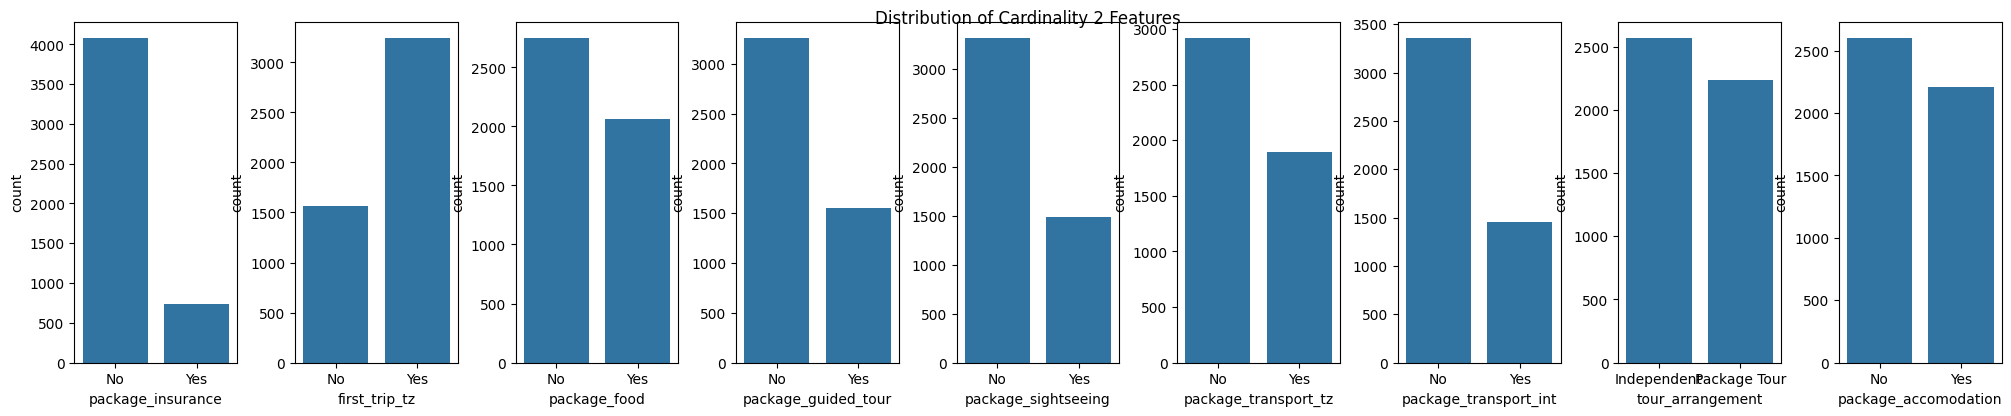

In [57]:
# plot distribution for cardinality_2 features
fig, ax = plt.subplots(1, len(cardinality_2))
fig.set_size_inches(20, 4)
fig.tight_layout()
fig.suptitle("Distribution of Cardinality 2 Features")

for i in range(len(cardinality_2)):
    sns.countplot(x=cardinality_2[i], data=train_df, ax=ax[i])

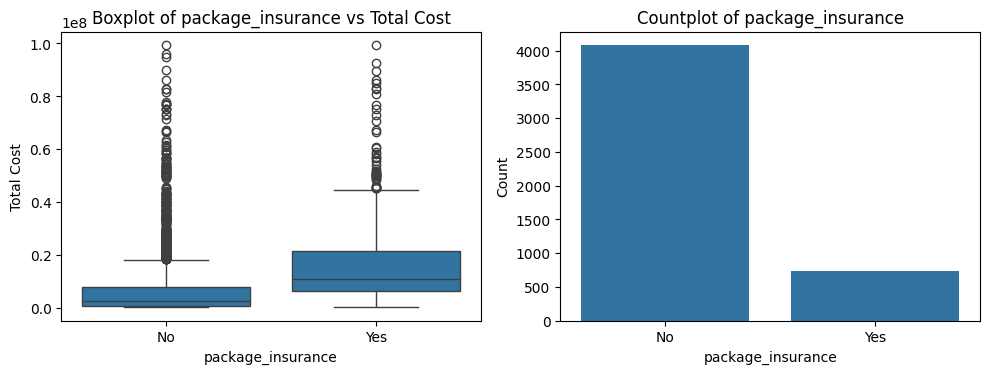

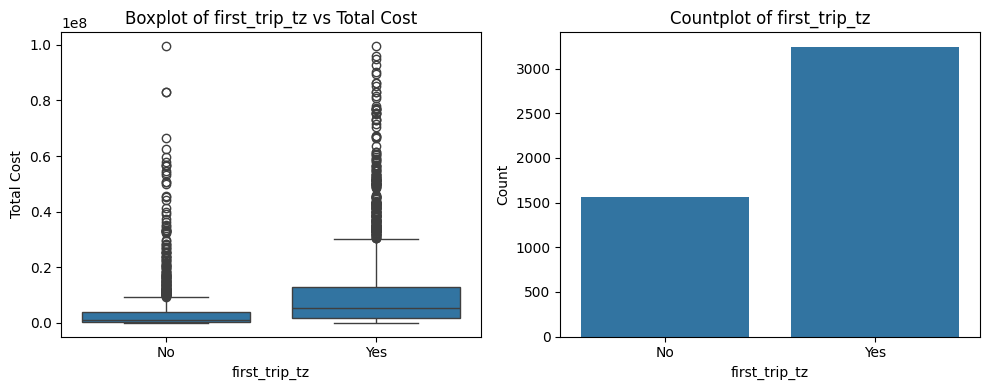

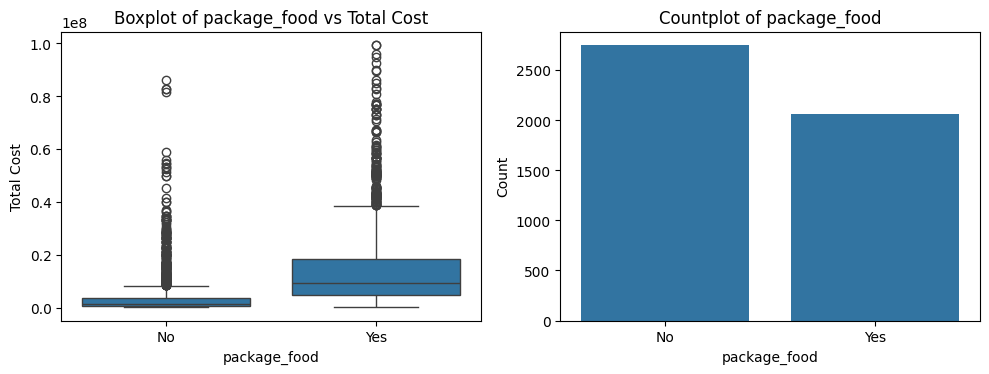

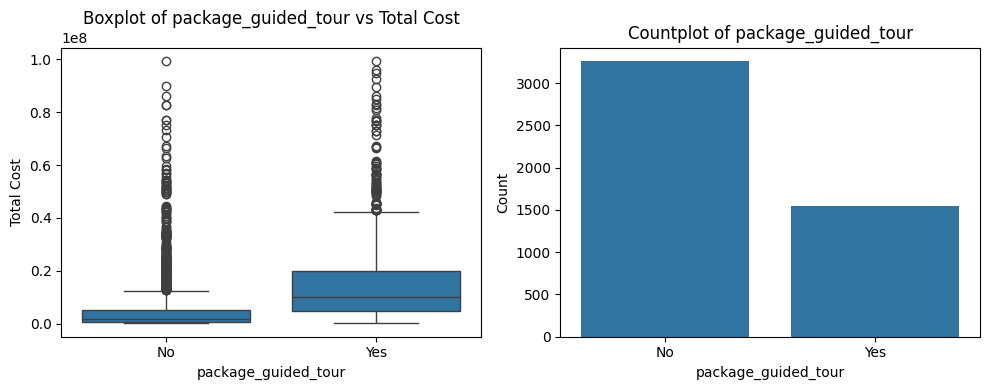

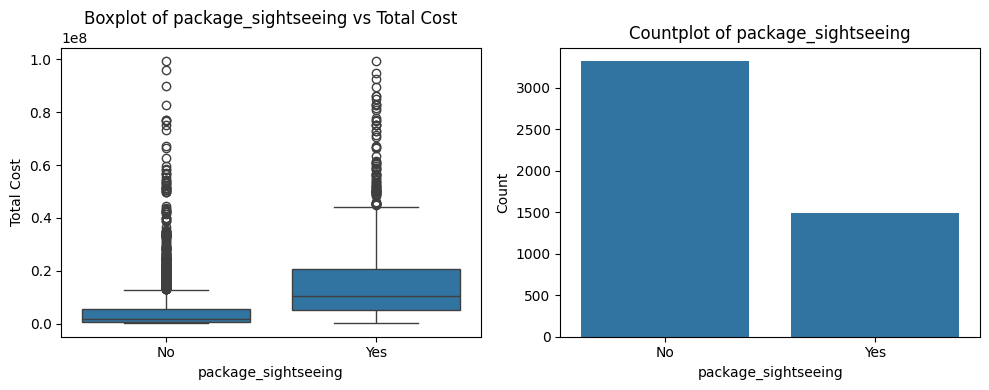

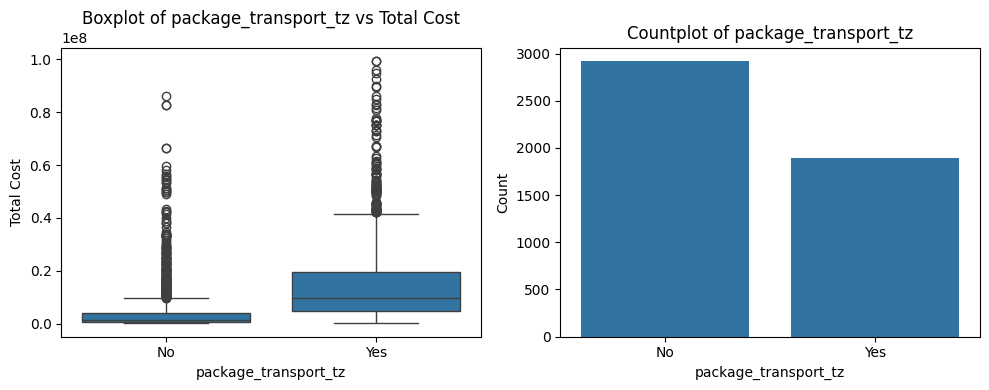

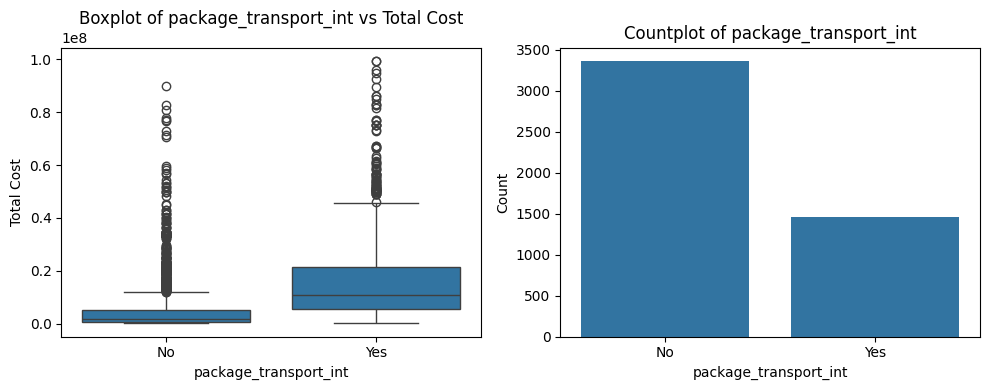

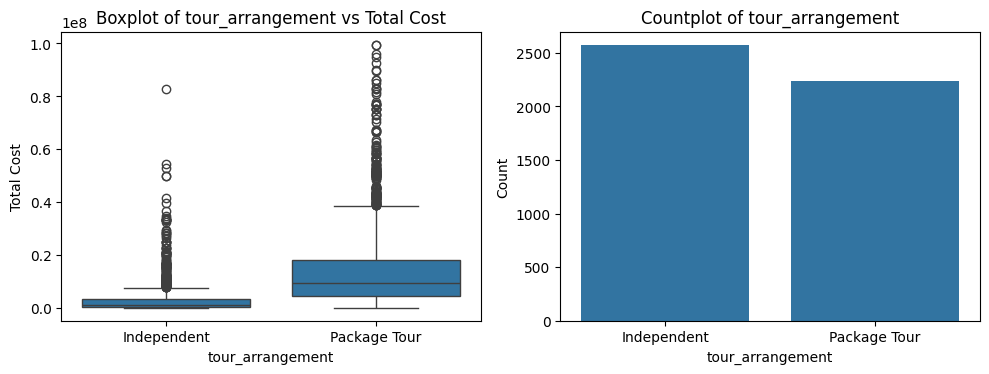

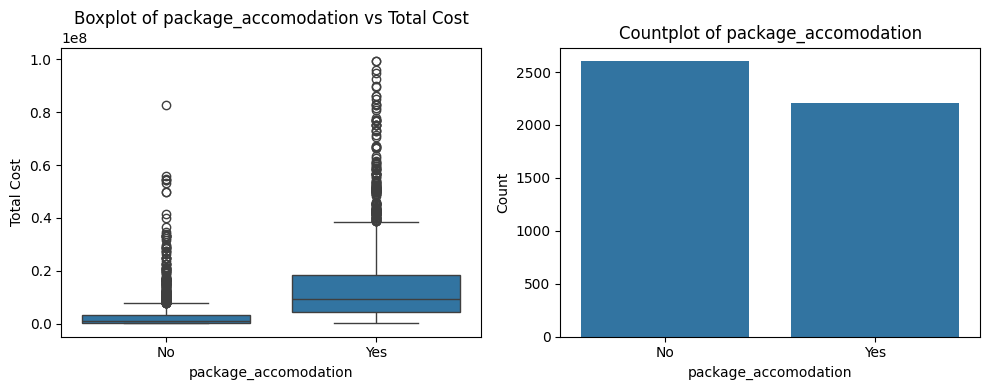

In [69]:
# Box plot of two cardinal feature

import matplotlib.pyplot as plt
import seaborn as sns

for col in cardinality_2:
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))  # Adjust figure size
    sns.boxplot(x=col, y="total_cost", data=train_df, ax=ax[0])
    ax[0].set_title(f'Boxplot of {col} vs Total Cost')
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('Total Cost')

    sns.countplot(x=col, data=train_df, ax=ax[1])
    ax[1].set_title(f'Countplot of {col}')
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('Count')

    plt.tight_layout()  # Adjust layout
    plt.show()


In [61]:
for col in cardinality_2:
    print(f"{col}: {train_df[col].unique()}")

package_insurance: ['No' 'Yes']
first_trip_tz: ['No' 'Yes']
package_food: ['No' 'Yes']
package_guided_tour: ['No' 'Yes']
package_sightseeing: ['No' 'Yes']
package_transport_tz: ['No' 'Yes']
package_transport_int: ['No' 'Yes']
tour_arrangement: ['Independent' 'Package Tour']
package_accomodation: ['No' 'Yes']


In [103]:
for col in cardinality_2:
    fig = px.box(train_df,
             x=col,
             y="total_cost",
             points="all",
             color=col,
             )
    fig.update_layout(
        title=f"Boxplot of {col} vs Total Cost",
        xaxis_title=col,
        yaxis_title="Total Cost",
    )
    fig.show()

In [105]:
package_features = [col for col in train_df.columns if col.startswith("package_")]
package_features

['package_transport_int',
 'package_accomodation',
 'package_food',
 'package_transport_tz',
 'package_sightseeing',
 'package_guided_tour',
 'package_insurance']

In [134]:
train_df_copy = train_df.copy()

In [135]:
# Replace value of `Yes` by 1 and `No` by 0
train_df_copy[package_features] = train_df_copy[package_features].map(lambda x: 1 if x == "Yes" else 0)

In [136]:
train_df_copy[package_features].head()

,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,1,1,1,1,1,0
4,0,0,0,0,0,0,0


In [137]:
# `Number_of_packages` sum of packages
train_df_copy["Number_of_Packages"] = train_df_copy[package_features].sum(axis=1)

In [138]:
train_df_copy["Number_of_Packages"].value_counts()

,count
Number_of_Packages,
0,2545
5,669
6,496
4,429
7,357
3,241
2,49
1,23


<Axes: xlabel='Number_of_Packages'>

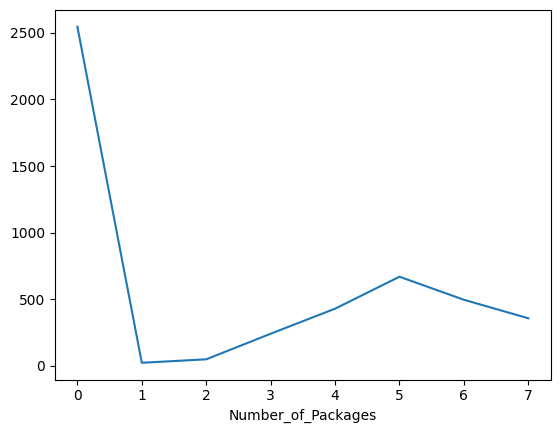

In [139]:
train_df_copy["Number_of_Packages"].value_counts().sort_index().plot()

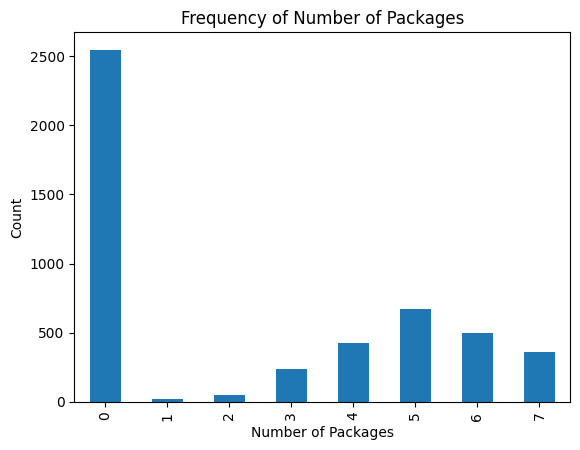

In [140]:
# Frequeny of number of packages in data
train_df_copy["Number_of_Packages"].value_counts().sort_index().plot(kind="bar")
plt.title("Frequency of Number of Packages")
plt.xlabel("Number of Packages")
plt.ylabel("Count")
plt.show()

In [151]:
age_group = train_df_copy["age_group"].unique()
age_group.sort()


fig = px.box(
    train_df_copy,
    color="Number_of_Packages",
    y="total_cost",
    x="age_group",
    category_orders={
        "Number_of_Packages": range(8),
        "age_group": age_group
                     },  # Specify the order
)

fig.update_layout(
    title="Boxplot of Total Cost by Number of Packages",
    xaxis_title="Age Group",
    yaxis_title="Total Cost",
)

fig.show()

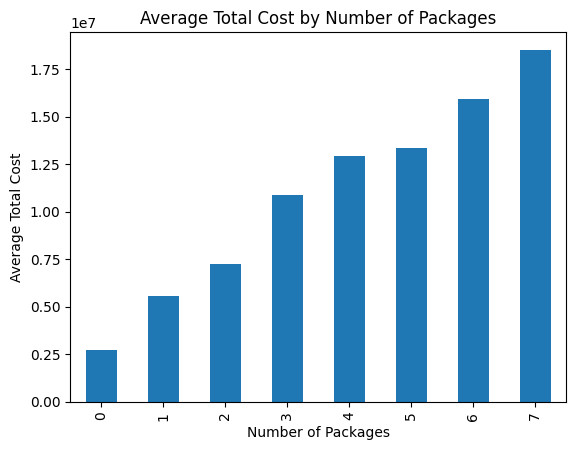

In [158]:
# Distribution plot of numbers packages vs total cost mean by group by number of packages
train_df_copy.groupby("Number_of_Packages")["total_cost"].mean().plot(kind="bar")
plt.title("Average Total Cost by Number of Packages")
plt.xlabel("Number of Packages")
plt.ylabel("Average Total Cost")
plt.show()

In [166]:
# Correlation between Number of packages and total cost

for col in package_features:
    print(f"{col}: {train_df_copy[col].corr(train_df_copy['total_cost'])}")

print(f'Number of packages: {train_df_copy["Number_of_Packages"].corr(train_df_copy["total_cost"])}')

package_transport_int: 0.42836224818040475
package_accomodation: 0.4633805748069376
package_food: 0.4354542498106208
package_transport_tz: 0.43437682162608604
package_sightseeing: 0.39405637128409615
package_guided_tour: 0.3730915671933562
package_insurance: 0.27269614455444874
Number of packages: 0.48969928290391956


# Age Group

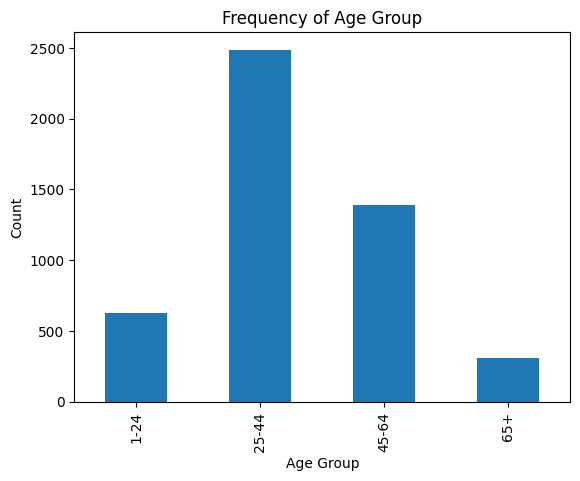

In [89]:
# Barchart plot `age_group`
train_df["age_group"].value_counts().sort_index().plot(kind="bar")
plt.title("Frequency of Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

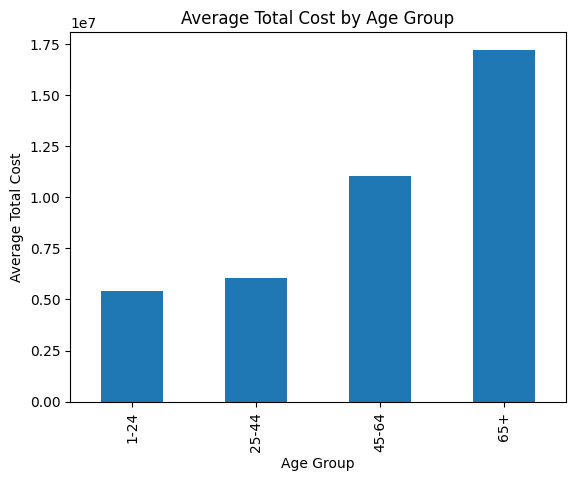

In [90]:
# group by age group and plot mean of total cost
train_df.groupby("age_group")["total_cost"].mean().plot(kind="bar")
plt.title("Average Total Cost by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Total Cost")
plt.show()

In [94]:
# boxplot on the age group

fig = px.box(train_df,
             x="age_group",
             y="total_cost",
             points="all",
             color="age_group",
             )
fig.update_layout(
    title="Boxplot of Total Cost by Age Group",
    xaxis_title="Age Group",
    yaxis_title="Total Cost",
)
fig.show()

# Country vs Total cost


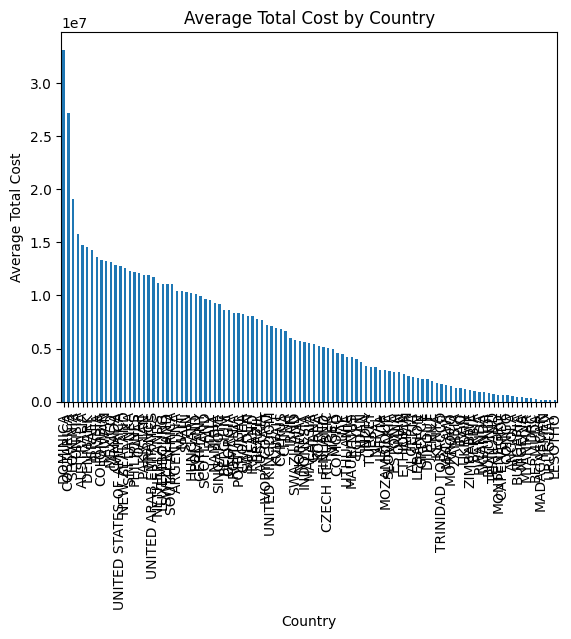

In [167]:
train_df.groupby("country")["total_cost"].mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Average Total Cost by Country")
plt.xlabel("Country")
plt.ylabel("Average Total Cost")
plt.show()

In [186]:
category_A_countries = set()
category_B_countries = set()
category_C_countries = set()

category_countries = [
    "Category A: High income.txt",
    "Category B: Upper middle income.txt",
    "Category C: Low and lower middle income.txt",
]

for category in category_countries:
    with open(FILE_PATH + category, "r") as f:
        for line in f:
            country = line.strip()
            if country != "Unknown":
                if category == "Category A: High income.txt":
                    category_A_countries.add(country)
                elif category == "Category B: Upper middle income.txt":
                    category_B_countries.add(country)
                elif category == "Category C: Low and lower middle income.txt":
                    category_C_countries.add(country)

In [187]:
print(f"Category A countries: {len(category_A_countries)}")
print(f"Category B countries: {len(category_B_countries)}")
print(f"Category C countries: {len(category_C_countries)}")

Category A countries: 72
Category B countries: 49
Category C countries: 69


In [182]:
! pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 41.7 MB/s eta 0:00:00


In [188]:
import pycountry

def country_to_iso3(country_name):
    try:
        country = pycountry.countries.search_fuzzy(country_name)[0]
        return country.alpha_3
    except LookupError:
        return "Unknown"


train_df['iso3'] = train_df_copy['country'].apply(country_to_iso3)


In [191]:
# based which caterogy country exist group them

def categorize_country(country):
    if country in category_A_countries:
        return "Category A"
    elif country in category_B_countries:
        return "Category B"
    elif country in category_C_countries:
        return "Category C"
    else:
        return "Unknown"

train_df_copy["country_category"] = train_df["iso3"].apply(categorize_country)

In [192]:
train_df_copy["country_category"].value_counts()

,count
country_category,
Category A,3126
Category C,1128
Category B,362
Unknown,193


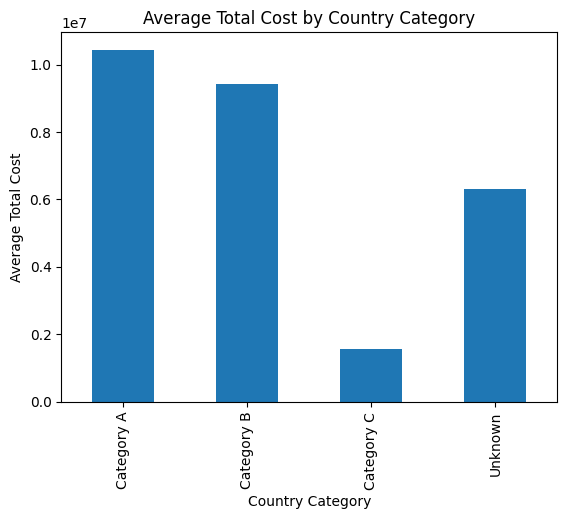

In [194]:
train_df_copy.groupby("country_category")["total_cost"].mean().plot(kind="bar")
plt.title("Average Total Cost by Country Category")
plt.xlabel("Country Category")
plt.ylabel("Average Total Cost")
plt.show()

In [195]:
train_df_copy.drop(columns=["country"], inplace=True)

In [199]:
# distribution total cost vs country category
fig = px.box(train_df_copy,
             x="country_category",
             y="total_cost",
             color="Number_of_Packages"

             )
fig.update_layout(
    title="Boxplot of Total Cost by Country Category",
    xaxis_title="Country Category",
    yaxis_title="Total Cost",
)
fig.show()

In [201]:
# total people

train_df_copy["total_people"] = train_df_copy["total_male"] + train_df_copy["total_female"]


In [212]:
(train_df_copy["total_people"] * train_df_copy["Number_of_Packages"]).corr(train_df_copy["total_cost"])

0.5127594042295345